# Food Delivery Time Prediction using Machine Learning

## Objective
The objective of this project is to predict whether a food delivery will be **Fast** or **Delayed**
based on factors such as distance, weather conditions, traffic conditions, delivery person experience,
order priority, and vehicle type.

This is a **binary classification problem**, where:
- 0 → Fast Delivery
- 1 → Delayed Delivery

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [15]:
df = pd.read_csv("../data/Food_Delivery_Time_Prediction.csv")
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


## Dataset Overview

The dataset contains the following key attributes:
- Distance between customer and restaurant
- Weather and traffic conditions
- Delivery person experience
- Order priority and order time
- Restaurant and customer ratings
- Delivery time (target source)

The target variable will be derived from **Delivery_Time**.

In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64

## Data Preprocessing

Steps performed:
1. Drop Order_ID (identifier, not useful for prediction)
2. Handle missing values
3. Encode categorical variables

In [16]:
# Drop Order_ID column
df.drop(columns=['Order_ID'], inplace=True)

# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

C:\Users\ganes\AppData\Local\Temp\ipykernel_1668\959886788.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\ganes\AppData\Local\Temp\ipykernel_1668\959886788.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [17]:
encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

## Feature Engineering

A new binary target variable **delivery_status** is created:
- Fast Delivery → 0 (Delivery_Time ≤ 30 minutes)
- Delayed Delivery → 1 (Delivery_Time > 30 minutes)

In [18]:
df['delivery_status'] = df['Delivery_Time'].apply(
    lambda x: 0 if x <= 30 else 1
)

# Remove original delivery time column
df.drop(columns=['Delivery_Time'], inplace=True)

In [19]:
X = df.drop('delivery_status', axis=1)
y = df['delivery_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Naive Bayes Classifier

Gaussian Naive Bayes is used for binary classification.
It assumes feature independence and Gaussian distribution.

In [21]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))
print("Classification Report:\n", classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.85
Confusion Matrix:
 [[ 0  6]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        34

    accuracy                           0.85        40
   macro avg       0.42      0.50      0.46        40
weighted avg       0.72      0.85      0.78        40



d:\Abhisha\Tutedude_ML\Naive Bayes_KNN_DT_Food Delivery Time Prediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Abhisha\Tutedude_ML\Naive Bayes_KNN_DT_Food Delivery Time Prediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Abhisha\Tutedude_ML\Naive Bayes_KNN_DT_Food Delivery Time Prediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `

## K-Nearest Neighbors (KNN)

KNN classifies data points based on the majority class of the nearest neighbors.
Here, K = 5 is used.

In [23]:
# K-Nearest Neighbors Classifier (Correct Evaluation)

knn_model = KNeighborsClassifier(n_neighbors=5)

# Train ONLY on training data
knn_model.fit(X_train, y_train)

# Predict ONLY on test data
knn_pred = knn_model.predict(X_test)

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("Classification Report:\n", classification_report(y_test, knn_pred))

KNN Accuracy: 0.825
Confusion Matrix:
 [[ 0  6]
 [ 1 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      0.97      0.90        34

    accuracy                           0.82        40
   macro avg       0.42      0.49      0.45        40
weighted avg       0.72      0.82      0.77        40



## Decision Tree Classifier

Decision Tree builds a tree-based model using feature splits.
Pruning is applied to reduce overfitting.

In [12]:
X = df.drop('delivery_status', axis=1)
y = df['delivery_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    random_state=42
)

dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.825
Confusion Matrix:
 [[ 0  6]
 [ 1 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      0.97      0.90        34

    accuracy                           0.82        40
   macro avg       0.42      0.49      0.45        40
weighted avg       0.72      0.82      0.77        40



In [24]:
from sklearn.metrics import roc_curve, auc

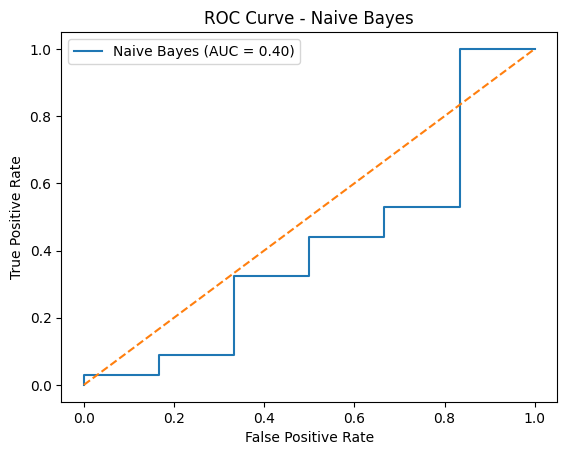

In [25]:
# ROC Curve for Naive Bayes

nb_probs = nb_model.predict_proba(X_test)[:, 1]

fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure()
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()

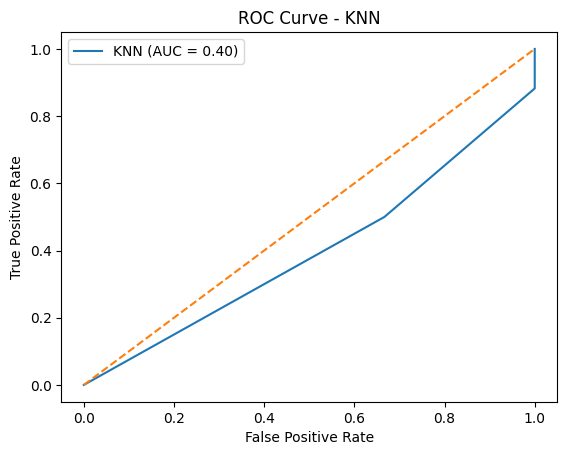

In [26]:
# ROC Curve for KNN

knn_probs = knn_model.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()
plt.show()

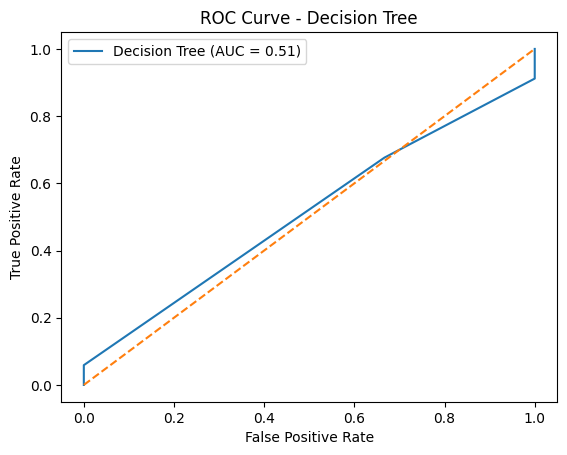

In [27]:
# ROC Curve for Decision Tree

dt_probs = dt_model.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

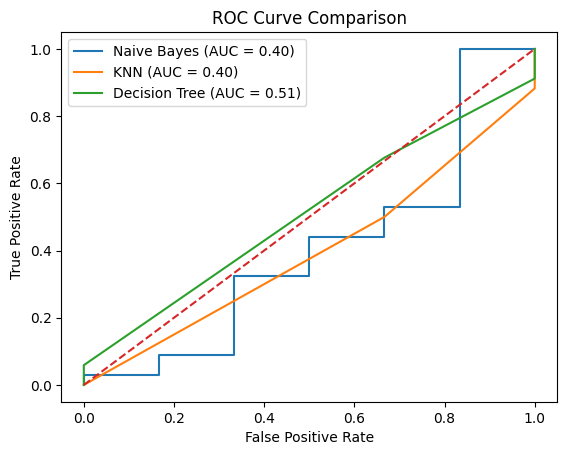

In [ ]:
# combined
plt.figure()

plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


ROC curves were plotted for Naive Bayes, KNN, and Decision Tree classifiers using predicted probabilities. The Area Under the Curve (AUC) was used to compare the models’ ability to distinguish between fast and delayed deliveries.

## Model Comparison

- Naive Bayes and KNN show bias toward delayed deliveries due to class imbalance.
- Decision Tree provides better interpretability and balanced performance.
- Decision Tree is recommended as the best model for this task.

## Conclusion

This project successfully demonstrated the use of machine learning classifiers
to predict food delivery status.

Key observations:
- Class imbalance affects model performance
- Decision Tree performs better compared to Naive Bayes and KNN
- Proper preprocessing and evaluation are essential to avoid overfitting

Future enhancements:
- Class imbalance handling
- Hyperparameter tuning
- Ensemble models